In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\Yiling C\AppData\Local\Temp\ipykernel_23856\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [30]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [31]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [32]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [33]:
#create the inspector and connect it to the engine

inspector = inspect(engine)


In [34]:
#collect the names of tables within the datrabase 
table_names = inspector.get_table_names()
table_names

['measurement', 'station']

In [35]:
#using the inspector to print the column names whitin the 'measurement' table and its types
m_columns = inspector.get_columns('Measurement')
for m_column in m_columns:
    print(m_column["name"], m_column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [36]:
#using the inspector to print the column names whitin the 'station' table and its types
s_columns = inspector.get_columns('Station')
for s_column in s_columns:
    print(s_column["name"], s_column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [37]:
# Find the most recent date for 'measurement' in the data set.
recent_date =session.query(Measurement).order_by(Measurement.date.desc()).first()
recent_date.date

'2017-08-23'

In [38]:
# Starting from the most recent data point in the database. 
print(f"The most recent date in the dataset is {recent_date.date}")

The most recent date in the dataset is 2017-08-23


In [39]:
#Calculate the date one year from the last date in the data set
one_year_before=dt.date(2017,8,23)-dt.timedelta(days=365)
print(f"One year before our most recent date equates to {one_year_before}")

One year before our most recent date equates to 2016-08-23


In [40]:
# Perform a query to retrieve the data and precipitation scores
pre_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_df = pd.DataFrame(pre_data, columns=['Date','Precipitation'])
data_df

# Sort the dataframe by date
sort_date = data_df.sort_values('Date')
sort_date
index_sort = data_df.set_index("Date")
index_sort

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


Text(0, 0.5, 'Inches')


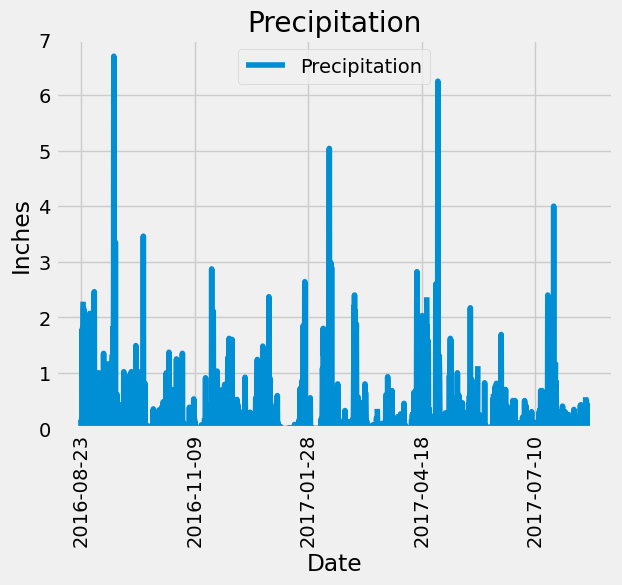

In [41]:
# Use Pandas Plotting with Matplotlib to plot the data
print("Text(0, 0.5, 'Inches')")
index_sort.plot()
plt.ylim(0,7)
plt.xticks(rotation=90)
plt.title("Precipitation")
plt.xlabel("Date")  
plt.ylabel("Inches")  
plt.show()


In [42]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [54]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()


[(9,)]

In [51]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
list_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
active = list_station.all()
most_act = list_station.first()[0]
print(f"The most action station is {most_act}")
active

The most action station is USC00519281


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [52]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
summery = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs), ).\
    filter(Measurement.station  == 'USC00519281').all()
summery

[(54.0, 85.0, 71.66378066378067)]

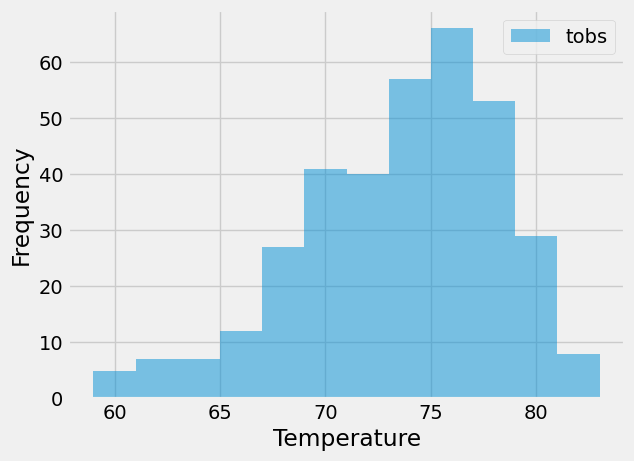

In [57]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date)
# Convert the query results to a DataFrame
station_temp_df = pd.DataFrame(station_temp, columns=['date', 'tobs'])
# Create a histogram of temperature observations
station_temp_df.plot.hist(bins=12, alpha=0.5)

# Label the x-axis
plt.xlabel('Temperature')

plt.show()

# Close Session

In [16]:
# Close Session
session.close()